# Create DA Bid Function Plots
---

In [7]:
import sys, os
import re
sys.path.append(os.path.realpath('.'))
sys.path.append(os.path.join(os.path.expanduser('~'), 'bnelearn'))

import torch
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['v', '^']

from bnelearn.experiment.configuration_manager import ConfigurationManager
from bnelearn.strategy import NeuralNetStrategy
from bnelearn.experiment.equilibria import (
    bne_bilateral_bargaining_uniform_linear,
    bne_bilateral_bargaining_uniform_symmetric)

### A. Load models

In [8]:
dir_path = "/home/pieroth/bnelearn/experiments/bargaining_paper_results/exp-3_experiment/double_auction/single_item/k_price/0.5/uniform/symmetric/risk_1.0/1b1s/2021-10-23 Sat 00.02/00 00:46:38 0/models"

models = list()
for file in os.listdir(dir_path):
    if file.endswith(".pt"):
        model_path = dir_path + '/' + file
        models.append(NeuralNetStrategy.load(model_path))
print(f'Found and loaded {len(models)} models in path.')

Found and loaded 2 models in path.


In [9]:
model_names = ['buyer', 'seller']

### B. Load BNEs

In [10]:
experiment_config = \
    ConfigurationManager(
        experiment_type='double_auction_single_item_uniform_symmetric',
        n_runs=1,  # repeat exp. for different random seeds
        n_epochs=0,
    )
experiment_config.setting.k = 0.5
experiment_config.setting.n_buyers = 1
bne_strategies = [bne_bilateral_bargaining_uniform_linear(experiment_config, 0, 1)]
bne_strategies += bne_bilateral_bargaining_uniform_symmetric(experiment_config)


In [11]:
bne_names = ['linear', '0.25', '0.45']

### C. Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


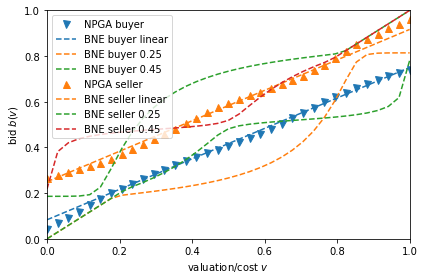

In [13]:
v = torch.linspace(0, 1, 35).view(-1, 1)

for i, model in enumerate(models):
    learned_bid = model.play(v).detach()
    plt.plot(
        v.numpy(), learned_bid.numpy(),
        markers[i], markersize=7,
        label=f'NPGA {model_names[i]}',
        color=colors[i])
    for j, bne_strategy in enumerate(bne_strategies):
        bne_bid = bne_strategy(v, i)
        plt.plot(
            v.numpy(), bne_bid.numpy(), '--',
            label=f'BNE {model_names[i]} {bne_names[j]}',
            color=colors[i+j])
plt.xlabel('valuation/cost $v$'); plt.ylabel('bid $b(v)$')
plt.xlim([0, 1]); plt.ylim([0, 1])
plt.legend(); plt.tight_layout()
plt.savefig('test.eps'); plt.show()